<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Qiskit Exploration: Quantum and Classical Registers
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2022
University of Illinois Board of Trustees. All Rights Reserved.

# imports

In [1]:
import qiskit
import numpy
import pandas

## conveniences

In [2]:
def find_backend(verbose=False):
    backends={}
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = numpy.inf

        if qubit_count>=2:
            backends[backend.name()]=backend.status().pending_jobs
            if verbose:
                print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
    backends_series=pandas.Series(backends)
    return backends_series.idxmin()

DEFAULT_BACKEND="ibmq_qasm_simulator"

# main

Quantum registers are converted into classical registers when observed.  We may have unobserved quantum registers.  We may also (although it may not be useful) to have classical registers which are not connected to quantum registers

In [3]:
tokenfile="../token.txt"
qiskit.IBMQ.save_account(open(tokenfile, "r").read())
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider("ibm-q")

configrc.store_credentials:WARNING:2022-05-19 20:42:42,590: Credentials already present. Set overwrite=True to overwrite.


## 2 quantum and 2 classical registers

In [4]:
circuit = qiskit.QuantumCircuit(2,2)
circuit.x(0)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0

In [5]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


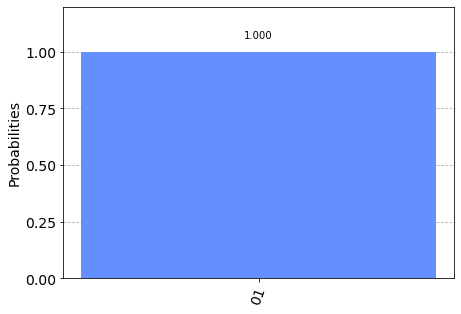

In [6]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])

## 3 quantum and 2 classical registers

In [7]:
circuit = qiskit.QuantumCircuit(3, 2)
circuit.x(0)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
q_2: ──╫───╫─
       ║   ║ 
c: 2/══╩═══╩═
       1   0

In [8]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


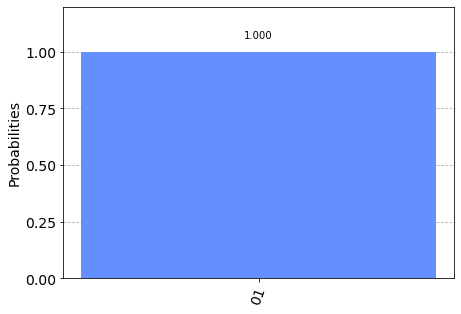

In [9]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])

## 2 quantum and 3 classical registers

In [10]:
circuit = qiskit.QuantumCircuit(2, 3)
circuit.x(0)
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 3/══╩═══╩═
       1   0

In [11]:
#bestbackend=find_backend()
#print("\nbest backend seems to be {0:s}".format(bestbackend))
backend = provider.get_backend(DEFAULT_BACKEND)
job = qiskit.execute(circuit, backend = backend, shots = 100)
qiskit.tools.monitor.job_monitor(job)

Job Status: job has successfully run


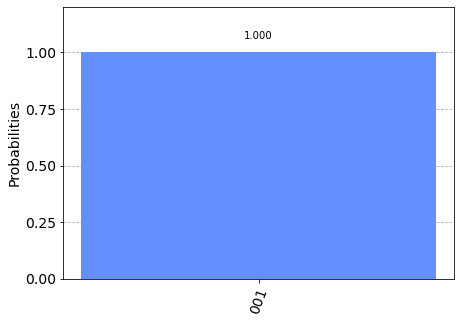

In [12]:
result = job.result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram([counts])